In [198]:
%matplotlib inline

from pathlib import Path
from scipy.stats import chisquare
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# K-Means Clusters 

# 1 Import File from the user

In [199]:
df = pd.read_csv("cleaned_churn.csv")

# 2 Convert integers into Float (Necessary step for Kmeans)

In [200]:
df = df.apply(lambda x: x.astype('float64'))

# 3 Show the first 5 rows and shape

In [201]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0.0,31953.0,0.0,6.0,313378.0,161.0,0.0,4.0,2.0,2.0,5.0,1.0
1,1.0,36147.0,0.0,13.0,800586.0,244.0,0.0,6.0,2.0,2.0,2.0,1.0
2,1.0,27273.0,230.0,0.0,305049.0,201.0,16.0,15.0,2.0,1.0,3.0,1.0
3,0.0,120070.0,38.0,33.0,788235.0,780.0,3.0,2.0,2.0,5.0,2.0,0.0
4,1.0,29215.0,208.0,85.0,224784.0,241.0,21.0,1.0,1.0,2.0,4.0,1.0


In [202]:
df.shape

(20000, 12)

# 4 Drop Categorical Variables and Choose necessary Numerical Variables

In [203]:
df = df.drop(["COLLEGE","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"],axis=1)

# 5 Normolize chosen variables

In [204]:
# Normalized distance
df_norm = df.apply(preprocessing.scale, axis=0)
df_norm.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,-1.160,-1.000,-0.667,-0.712,-1.069,-0.896,-4.548e-01
1,-1.059,-1.000,-0.406,1.218,-0.681,-0.896,-5.111e-04
2,-1.272,1.675,-0.891,-0.745,-0.882,0.896,2.044e+00
3,0.955,-0.558,0.339,1.169,1.826,-0.560,-9.091e-01
4,-1.225,1.419,2.279,-1.063,-0.695,1.456,-1.136e+00


# 6 Check the number of k by elbow plot

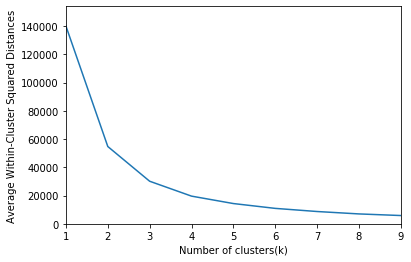

In [205]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

# 7 Choose the number of clusters (k) to run K means

In [206]:
# Fit a k-Means clustering with k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_norm)


# 8 Show the result centroid value

In [207]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
pd.set_option('precision', 3) # round to 3 decimal places
print(centroids)

   INCOME  OVERAGE  LEFTOVER  HOUSE  HANDSET_PRICE  \
0   1.200   -0.410    -0.131 -0.012          1.311   
1  -0.574   -0.602    -0.612 -0.009         -0.589   
2  -0.077    1.300    -0.155  0.003         -0.117   
3  -0.385   -0.401     1.373  0.025         -0.435   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  
0                       -0.449                  0.019  
1                       -0.600                  0.502  
2                        1.362                  0.083  
3                       -0.447                 -0.957  


# 9 Show sum of squared distance of each data point in a dataset

In [208]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_}, 
    index=df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (4533 members): 19327.23 within cluster 
Cluster 1 (6189 members): 17865.12 within cluster 
Cluster 2 (5470 members): 27964.45 within cluster 
Cluster 3 (3808 members): 13257.48 within cluster 


# 10 Show the Profile Plot of Cluster Centroids

(-0.5, 7.5)

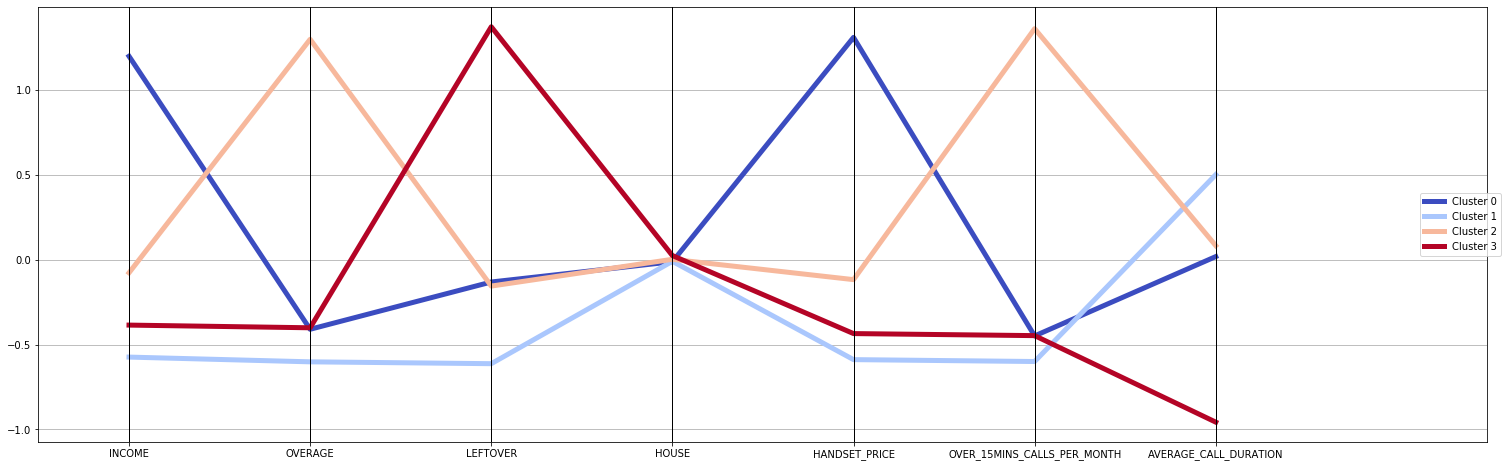

In [209]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig = plt.figure(figsize=(7,8))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='coolwarm', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [212]:
# End. Append the cluster number to each instance if the clusters above are useful

SyntaxError: invalid syntax (<ipython-input-214-95723c512721>, line 1)